In [6]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# import warnings
# warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
df = pd.read_csv('data/students.csv')

In [8]:
df.shape

(1000, 8)

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data Checks to perform <br>

1. Check Missing values <br>
2. Check duplicates<br>
3. Check data types <br>
4. Check the number of unique values of each column <br>
5. Check statistics of the dataset <br>
6. Check categories present in various categorical variables <br>

### Check Missing Values

In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Check Duplicates

In [11]:
df.duplicated().sum()

0

### Check data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of unique values of each column

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check statistics of the dataset

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Check categories present in various categorical variables

In [15]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [18]:
print("Categories in 'gender' variable:   ", end = " ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end = " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end = " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end = " ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:    ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [19]:
# Define numerical and categorical variables
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding columns for total scores and average

In [20]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
reading_full = df[df['reading_score']==100]['average_score'].count()
writing_full = df[df['writing_score']==100]['average_score'].count()
math_full = df[df['math_score']==100]['average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [23]:
reading_less_20 = df[df['reading_score']<21]['average_score'].count()
writing_less_20 = df[df['writing_score']<21]['average_score'].count()
math_less_20 = df[df['math_score']<21]['average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


## Histogram and KDE

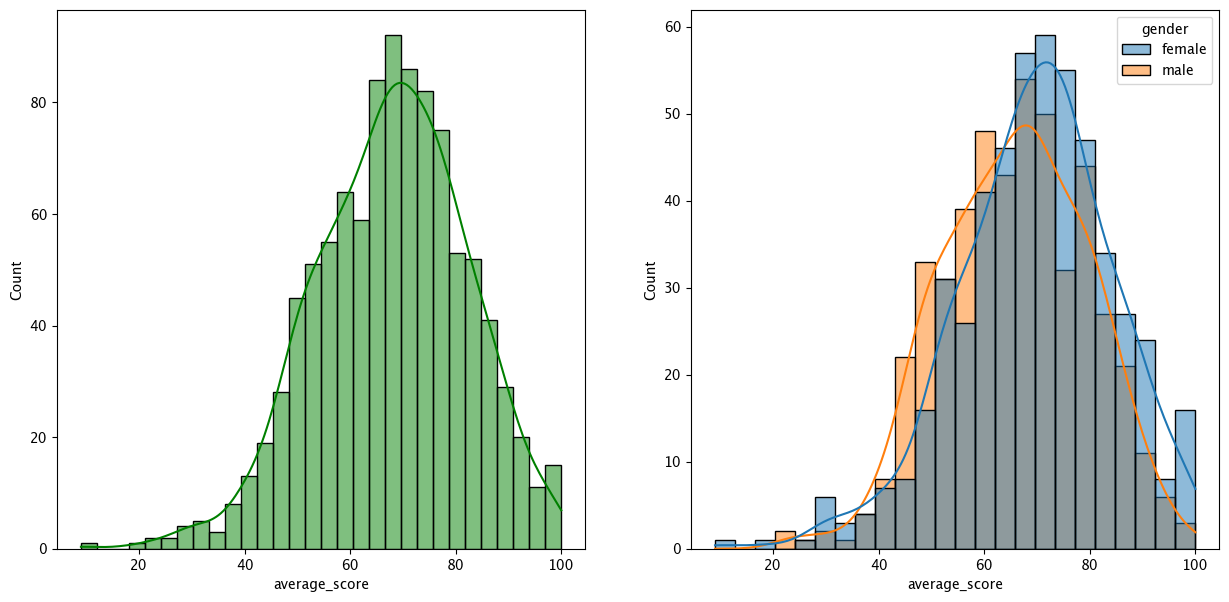

In [19]:
fig, axs = plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.show()


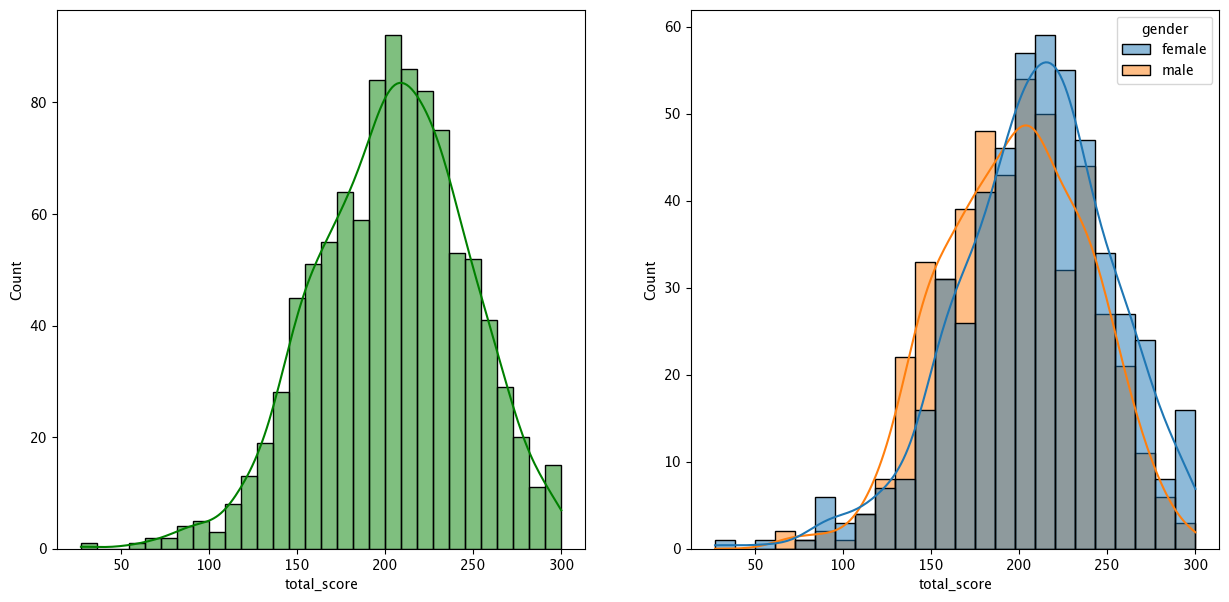

In [20]:
fig, axs = plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()


Female students perform better than male students

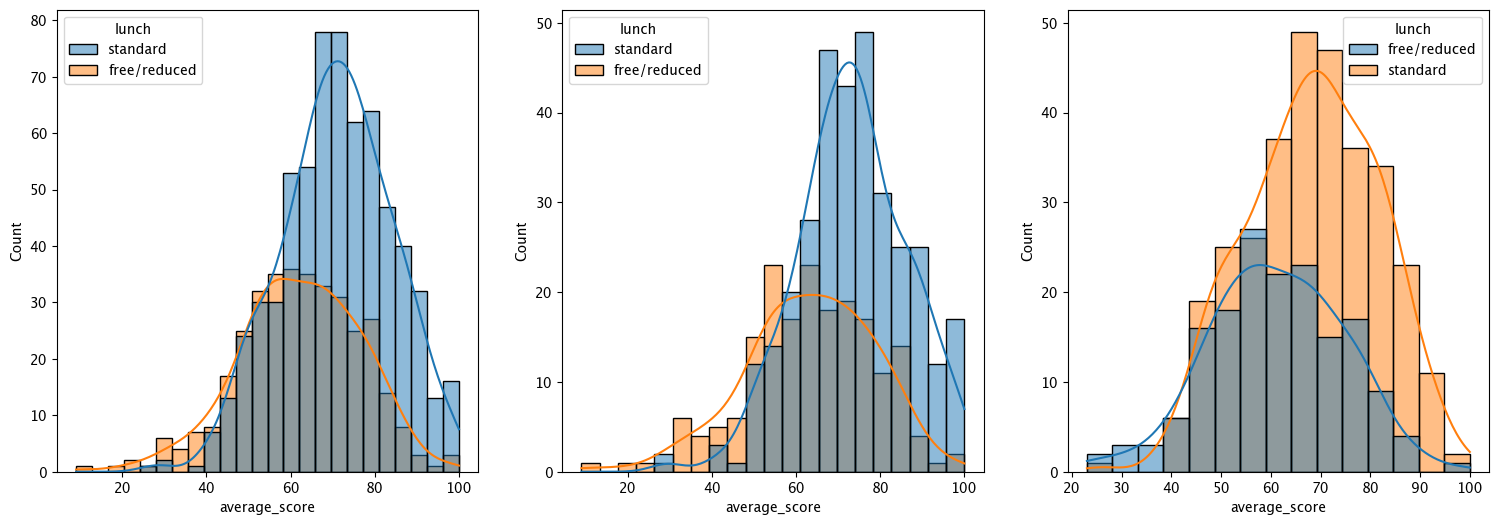

In [21]:
plt.subplots(1,3, figsize =(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='lunch')
plt.show()

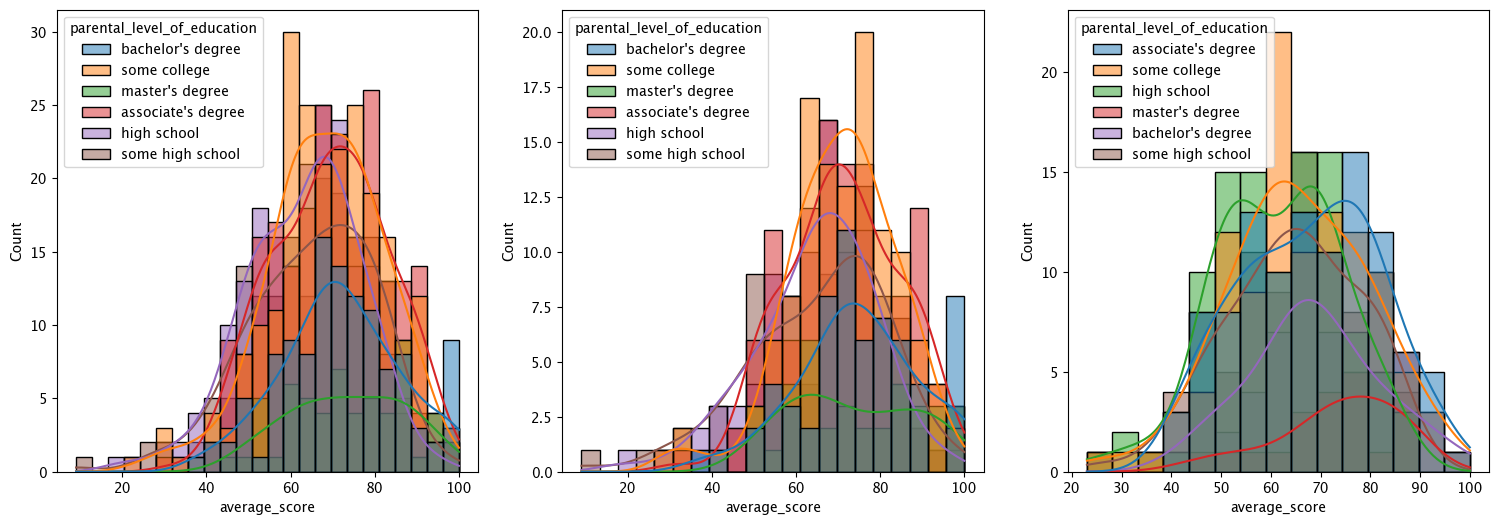

In [24]:
plt.subplots(1,3, figsize =(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='parental_level_of_education')
plt.show()

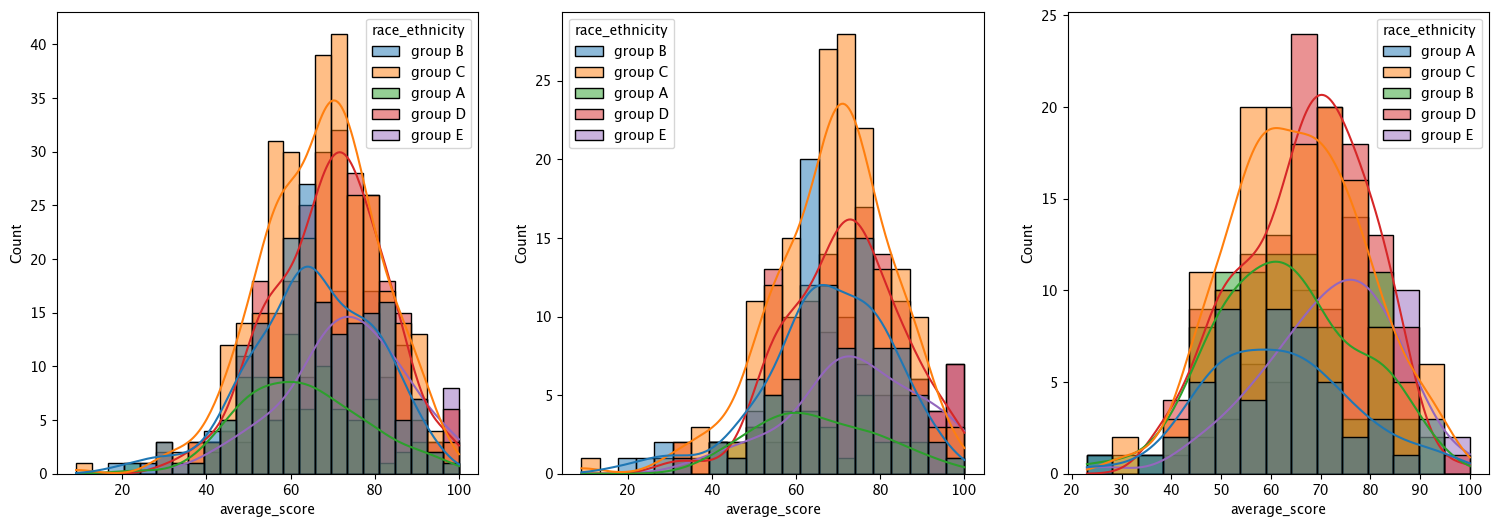

In [25]:
plt.subplots(1,3, figsize =(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='race_ethnicity')
plt.show()

### Maximum score of students in all three subjects

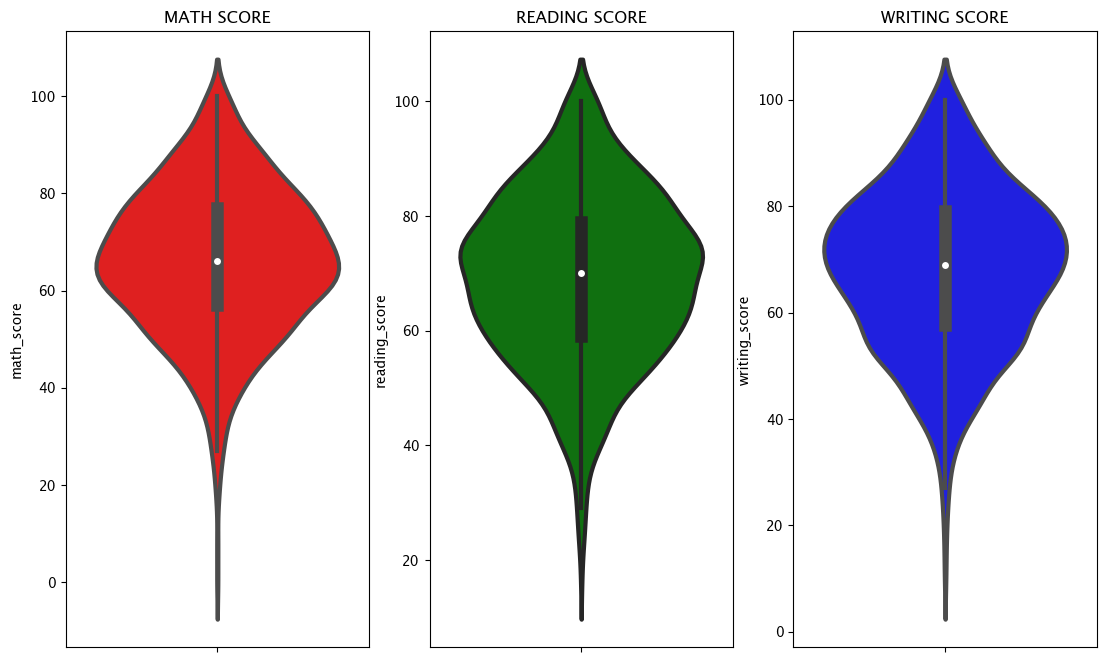

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORE')
sns.violinplot(y='math_score', data=df,  color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading_score', data=df,  color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing_score', data=df,  color='blue', linewidth=3)
plt.show()


### Multivariate analysis using pieplot

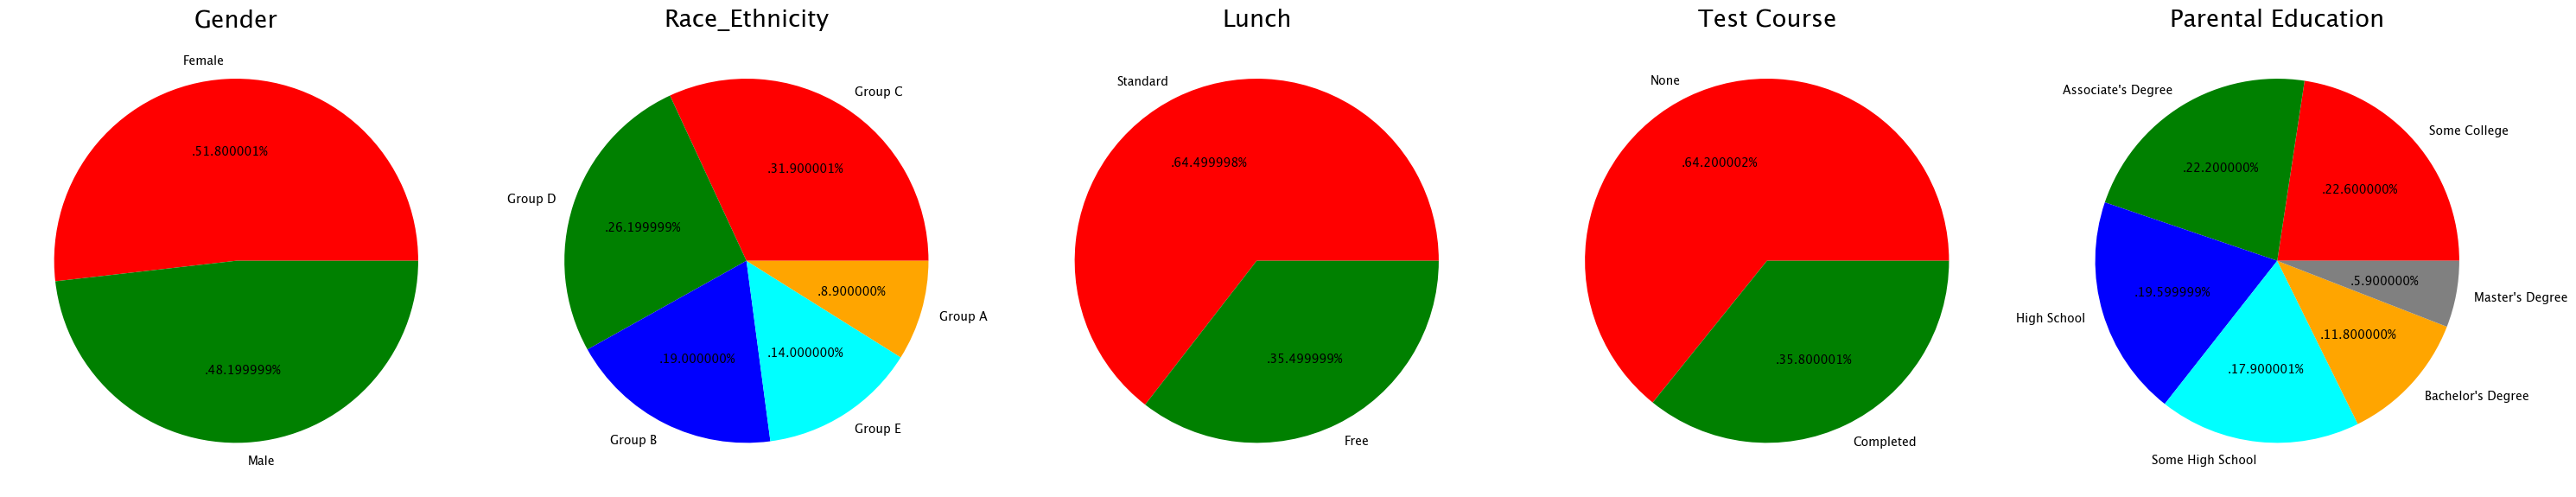

In [27]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Number of Male and Female students is almost equal<br>
Number students are greatest in Group C<br>
Number of students who have standard lunch are greater<br>
Number of students who have not enrolled in any test preparation course is greater<br>
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## Feature wise visualisations

Gender column<br>
How is distribution of Gender ?<br>
Is gender has any impact on student's performance ?

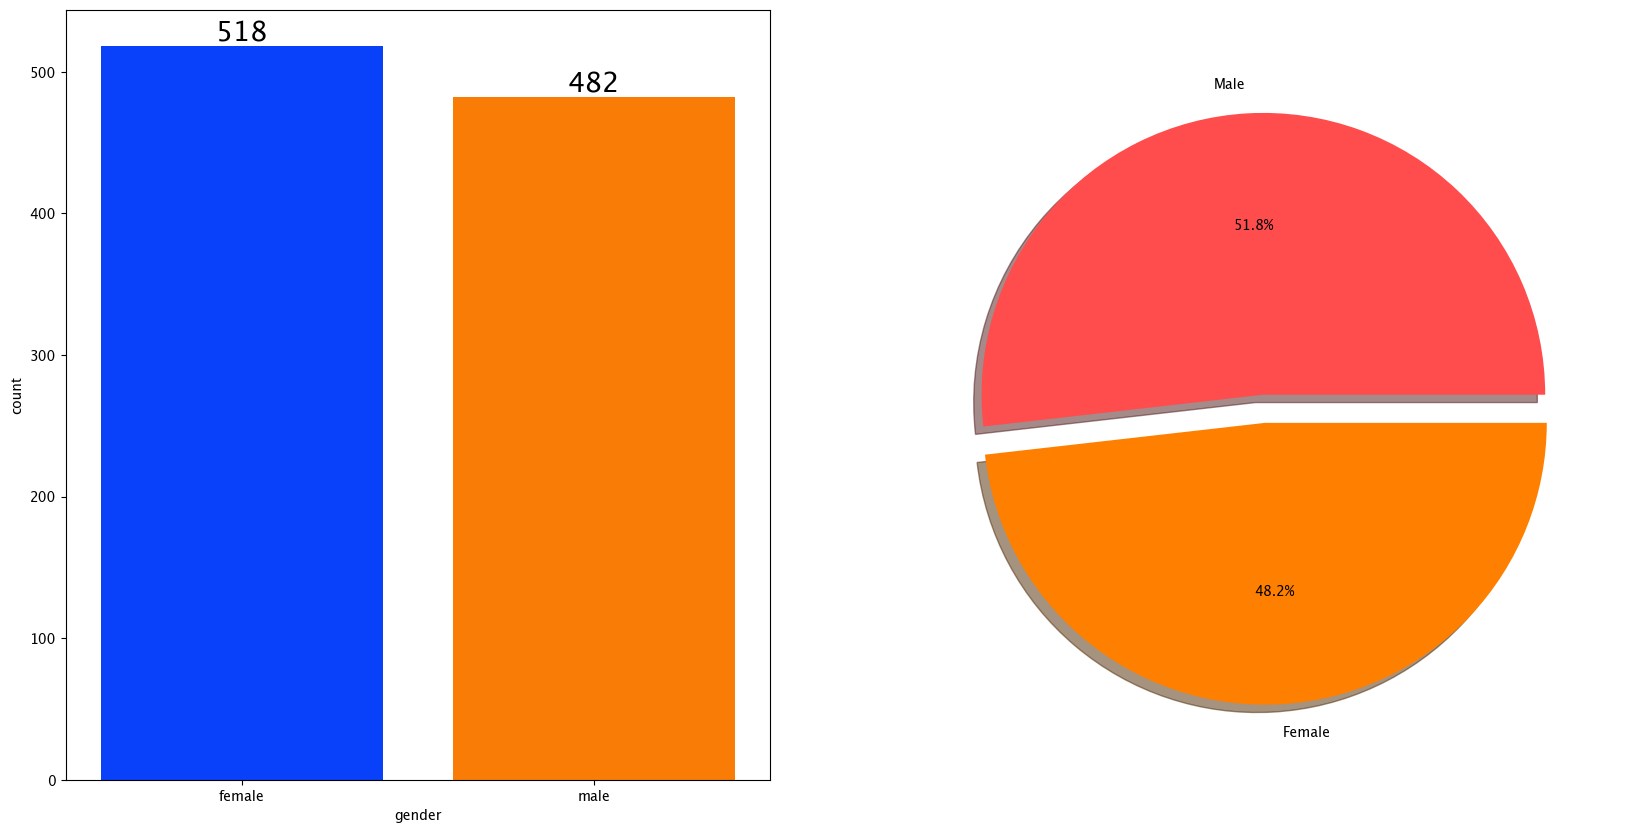

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [29]:
gender_group = df.groupby('gender').mean('math_score')
gender_group


,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


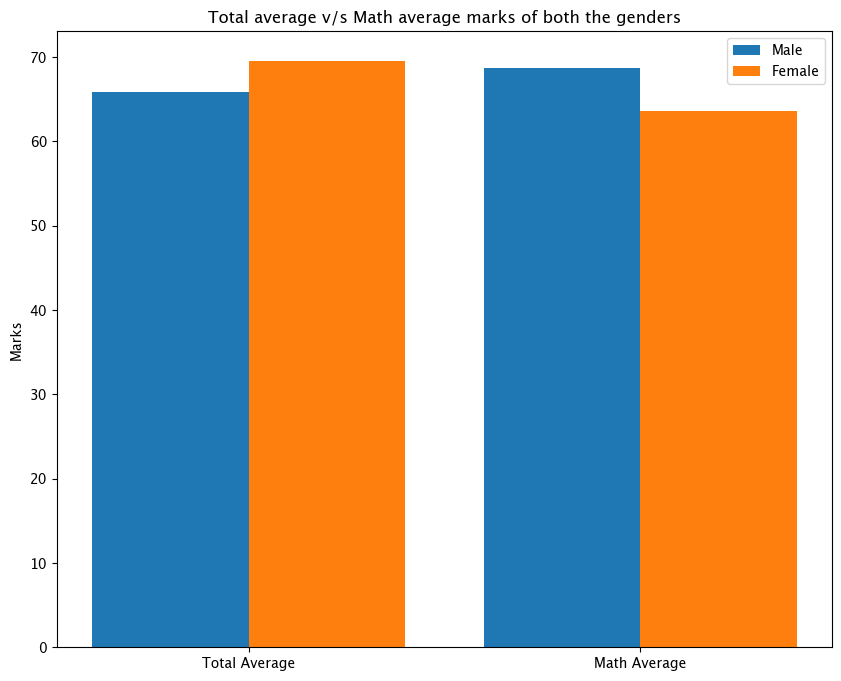

In [47]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

On an average females have a better overall score than men.<br>
whereas males have scored higher in Maths.

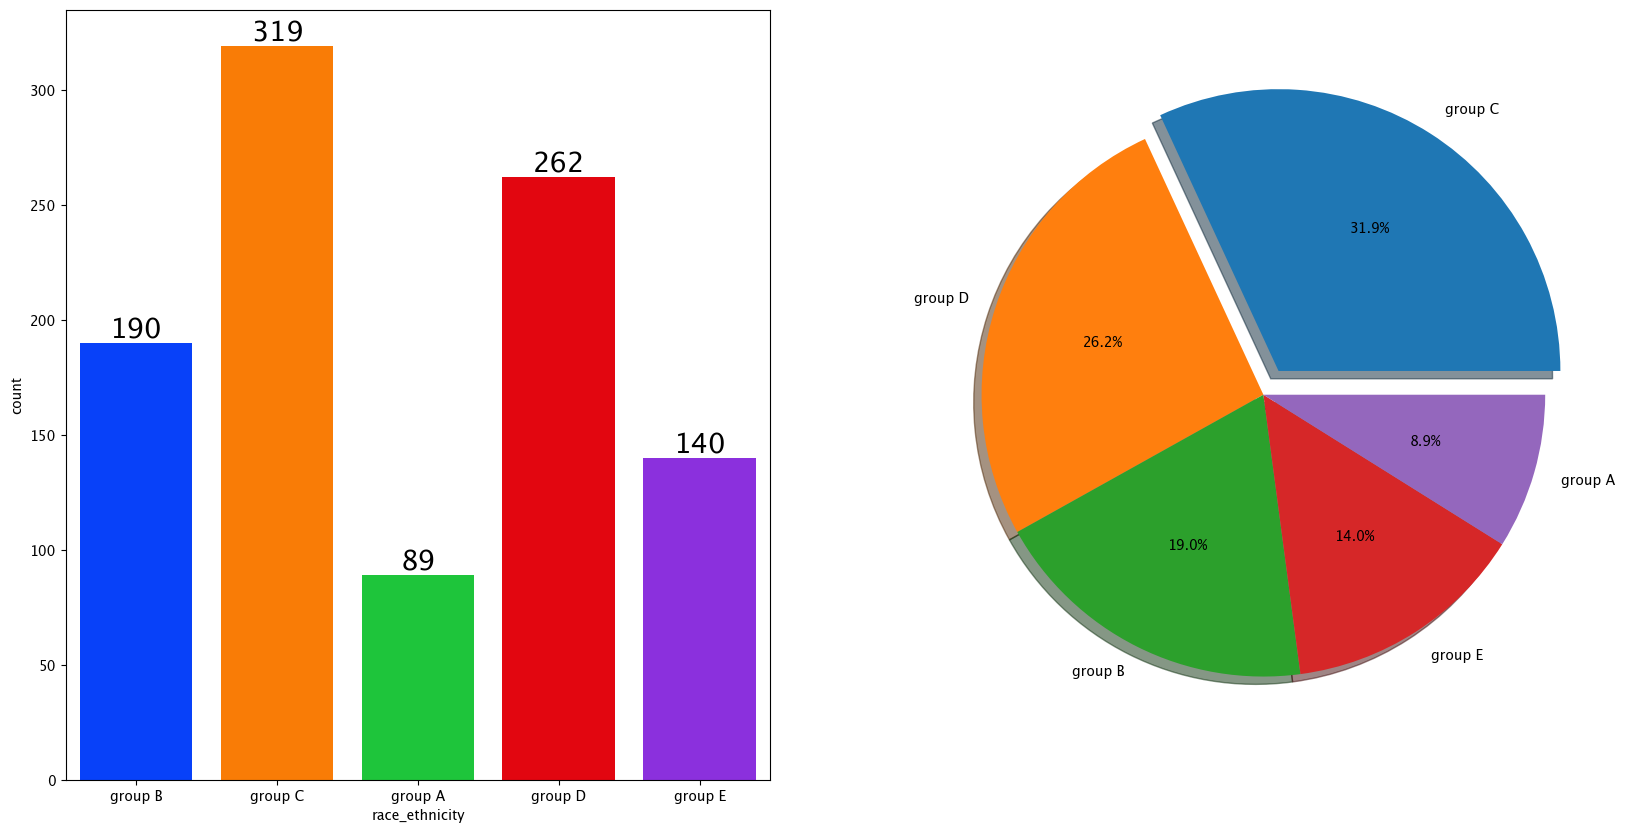

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

Most of the student belonging from group C /group D.<br>
Lowest number of students belong to groupA.

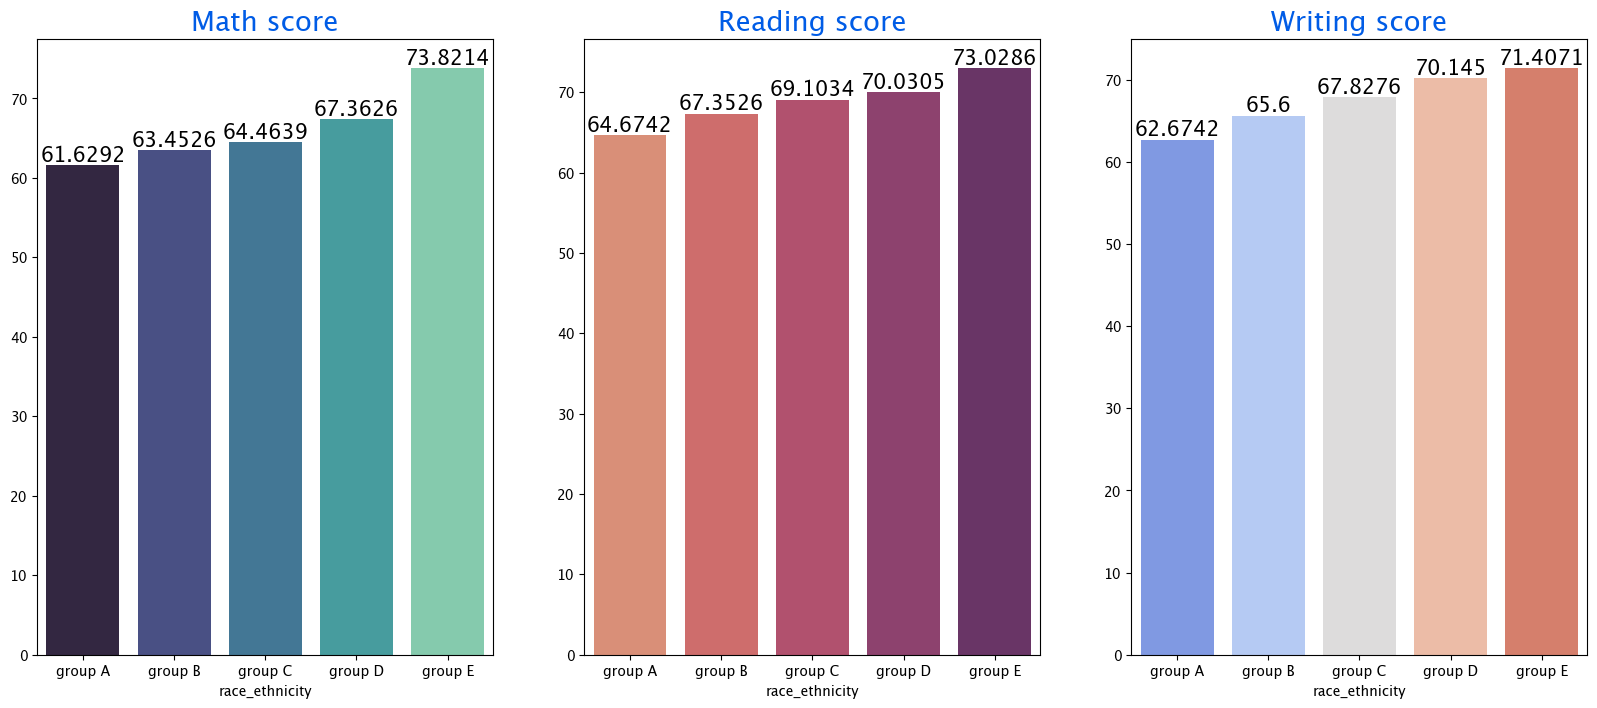

In [31]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Group E students have scored the highest marks.<br>
Group A students have scored the lowest marks.<br>
Students from a lower Socioeconomic status have a lower avg in all course subjects

In [32]:
parent_group = df.groupby('parental_level_of_education').mean('math_score')
parent_group

,math_score,reading_score,writing_score,total_score,average_score
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


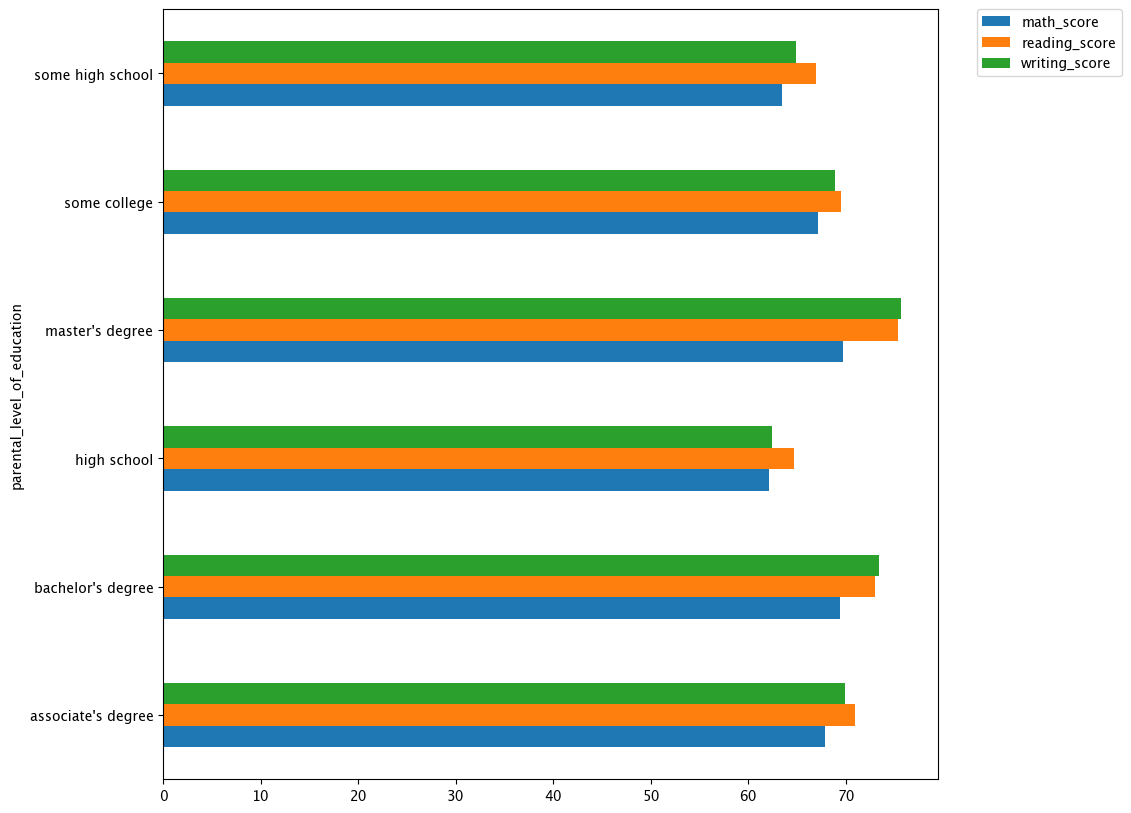

In [33]:
parent_group[['math_score','reading_score','writing_score']].plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The score of student whose parents possess master and bachelor level education are higher than others.

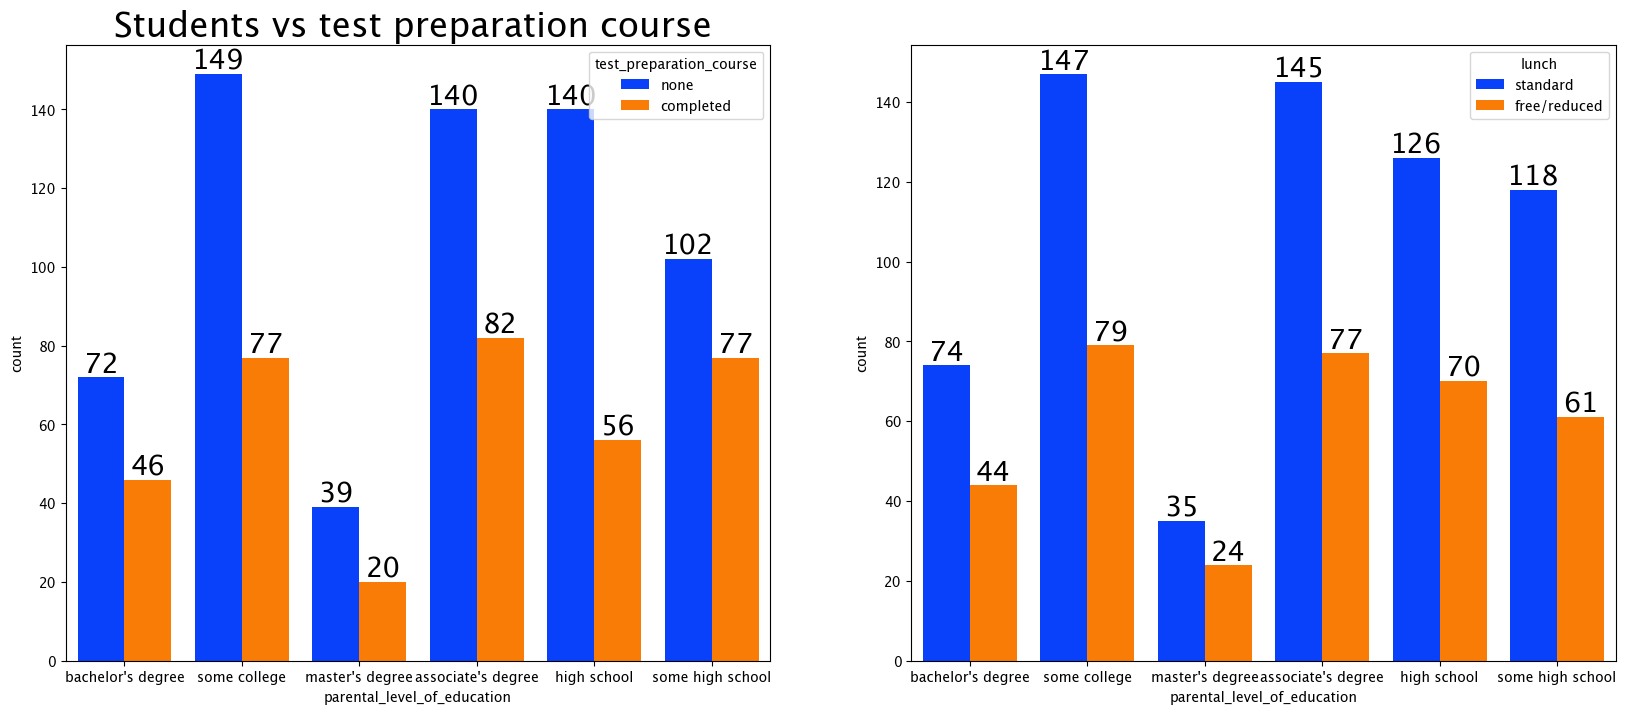

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

<Axes: xlabel='lunch', ylabel='writing_score'>

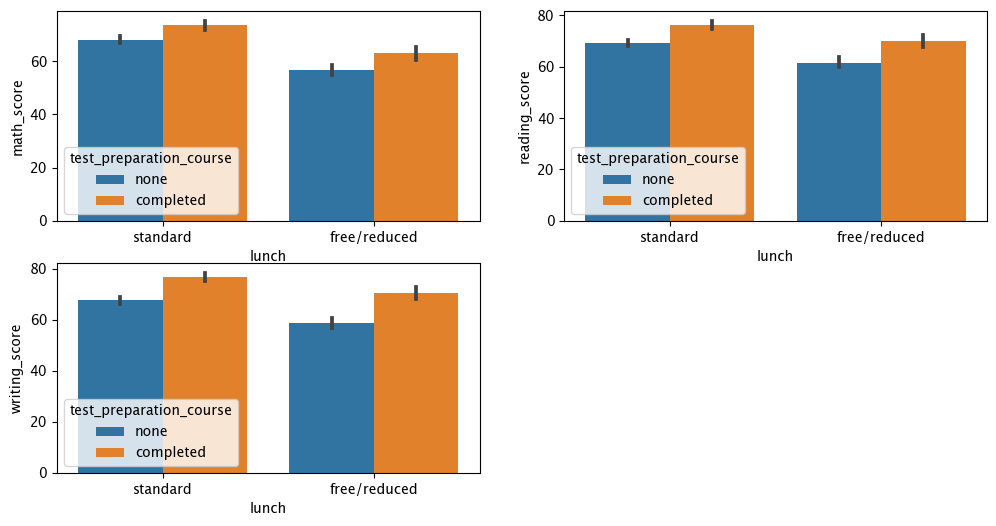

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

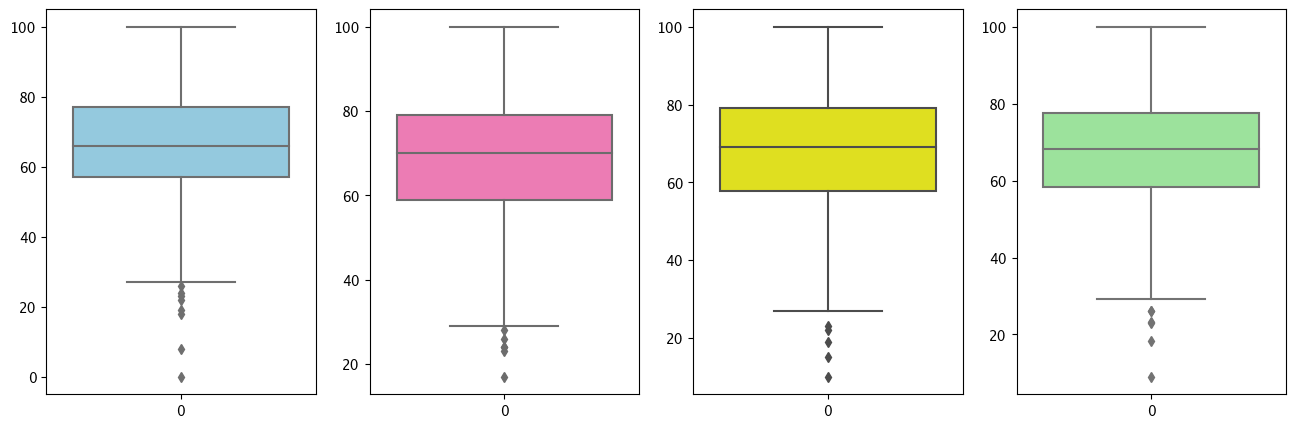

In [36]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

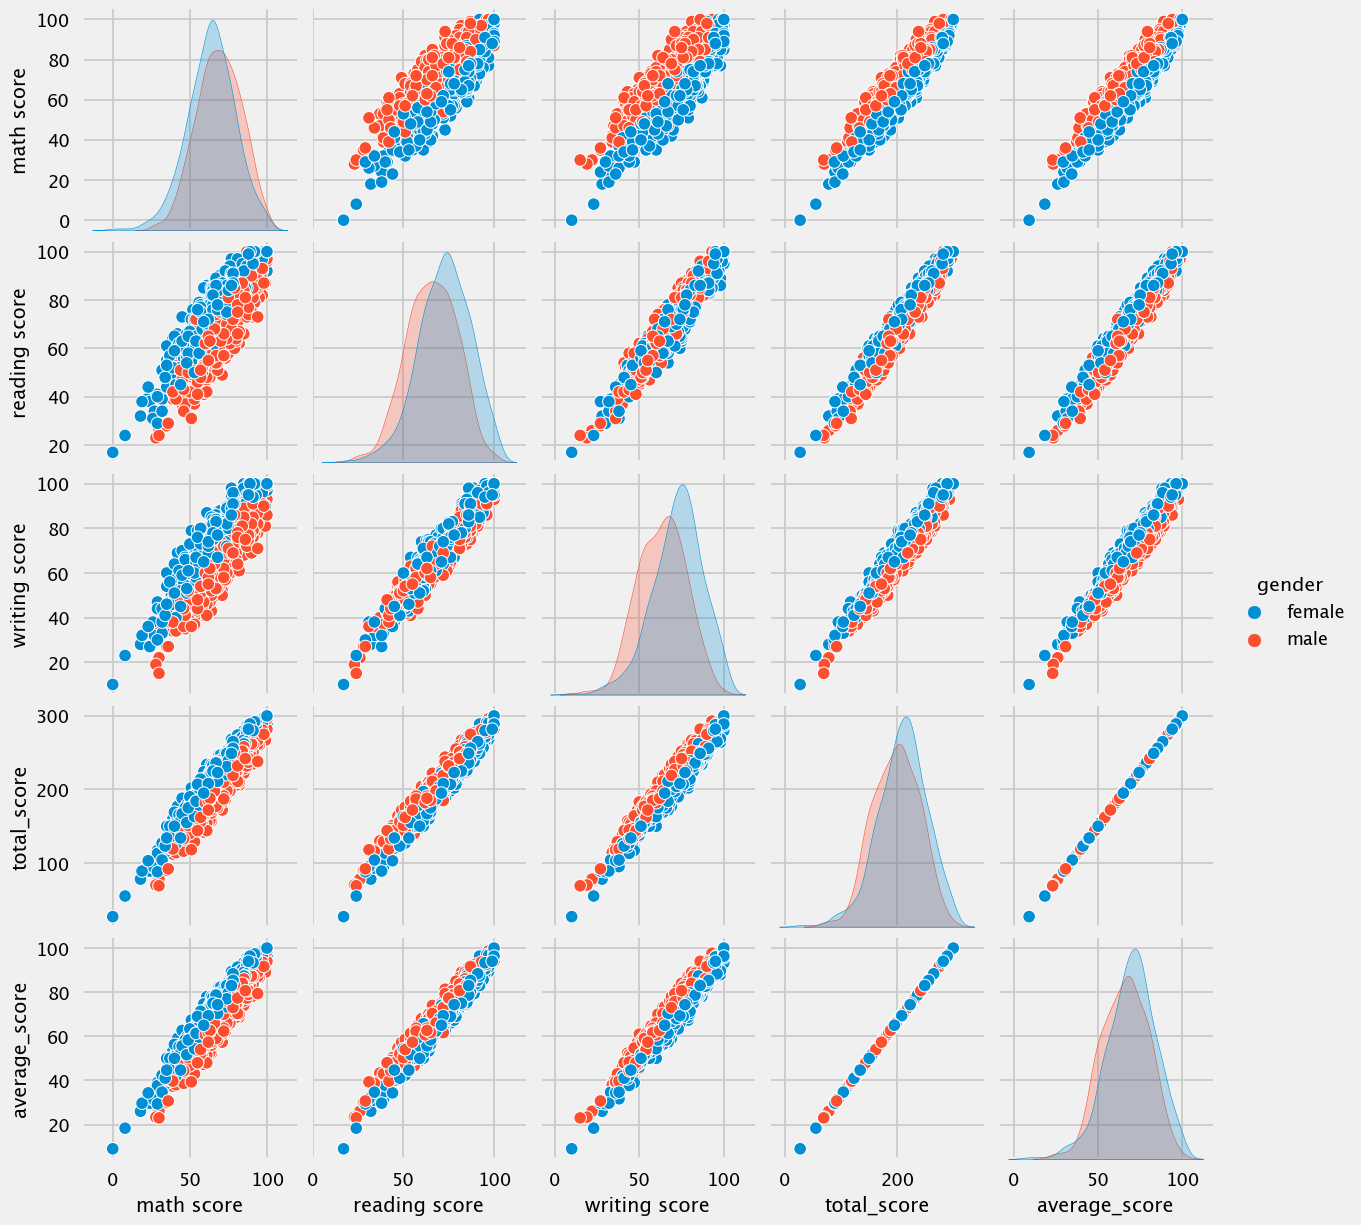

In [64]:
sns.pairplot(df,hue = 'gender')
plt.show()

From the above plot it is clear that all the scores increase linearly with each other.


Student's Performance is related with lunch, race, parental level education<br>
Females lead in pass percentage and also are top-scorers<br>
Student's Performance is not much related with test preparation course<br>
Finishing preparation course is benefitial.

### ANOVA Test

Finding correlation between variables and test scores<br>
Given that all variables here is a categorical data, we will need to use 1-way ANOVA test to calculate correlation.<br>

We will be using 95% confidence interval (95% chance that the confidence interval you calculated contains the true population mean).<br>
1. The null hypothesis is that they are independent.<br>
2. The alternative hypothesis is that they are correlated in some way.<br>

In [37]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [75]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [38]:
# Rename the columns
# df.rename(columns = {'math score':'math_score','reading score':'reading_score','writing score':'writing_score','race/ethnicity':'race_ethnicity','parental level of education':'parental_level_of_education','test preparation course':'test_preparation_course'}, inplace=True)
print(df.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')


In [83]:
print(df.columns)

df.columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score']


def anova_test(data, variable):
    '''
    Args: data (DataFrame), variable: Categorical columns that you want to do 1-way ANOVA test with
    
    Returns: Nothing
    '''
    x = ['math_score', 'reading_score', 'writing_score']
    for i,k in enumerate(x):
        lm = ols('{} ~ {}'.format(x[i],variable), data = data).fit()
        table = sm.stats.anova_lm(lm)
        print("P-value for 1-way ANOVA test between {} and {} is ".format(x[i],variable),table.loc[variable,'PR(>F)'])

anova_test(df, 'gender')

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')
P-value for 1-way ANOVA test between math_score and gender is  9.120185549333453e-08
P-value for 1-way ANOVA test between reading_score and gender is  4.680538743934009e-15
P-value for 1-way ANOVA test between writing_score and gender is  2.0198777068682407e-22


We obtained a P-value < 0.05, this means we can reject the null hypothesis and accept the alternative hypothesis that gender and the test scores are correlated.

In [84]:
anova_test(df,'race_ethnicity')

P-value for 1-way ANOVA test between math_score and race_ethnicity is  1.3732194030370688e-11
P-value for 1-way ANOVA test between reading_score and race_ethnicity is  0.0001780089103235852
P-value for 1-way ANOVA test between writing_score and race_ethnicity is  1.0979189070066777e-05


We obtained a P-value < 0.05, this means we can reject the null hypothesis and accept the alternative hypothesis that race and the test scores are correlated.

In [85]:
anova_test(df,'parental_level_of_education')

P-value for 1-way ANOVA test between math_score and parental_level_of_education is  5.592272384108375e-06
P-value for 1-way ANOVA test between reading_score and parental_level_of_education is  1.1682457045709003e-08
P-value for 1-way ANOVA test between writing_score and parental_level_of_education is  1.1202799969774331e-13


We obtained a P-value < 0.05, this means we can reject the null hypothesis and accept the alternative hypothesis that parents' education and the student's test scores are correlated.

In [86]:
anova_test(df,'lunch')

P-value for 1-way ANOVA test between math_score and lunch is  2.413195599315183e-30
P-value for 1-way ANOVA test between reading_score and lunch is  2.0027966545288553e-13
P-value for 1-way ANOVA test between writing_score and lunch is  3.1861895831680456e-15


We obtained a P-value < 0.05, this means we can reject the null hypothesis and accept the alternative hypothesis that quality/type of lunch and the student's test scores are correlated.

In [87]:
anova_test(df,'test_preparation_course')

P-value for 1-way ANOVA test between math_score and test_preparation_course is  1.5359134607155386e-08
P-value for 1-way ANOVA test between reading_score and test_preparation_course is  9.081783336895556e-15
P-value for 1-way ANOVA test between writing_score and test_preparation_course is  3.6852917352476696e-24


We obtained a P-value < 0.05, this means we can reject the null hypothesis and accept the alternative hypothesis that test preparation courses and the student's test scores are correlated.